In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载三个模型的误分类样本数据
xgboost_df = pd.read_csv('./XGBoost_misclassified_samples.csv')
lightgbm_df = pd.read_csv('./LightGBM_misclassified_samples.csv')
svm_df = pd.read_csv('./SVM_misclassified_samples.csv')

# 合并三个模型的误分类样本，分别为每个模型加一个标签
xgboost_df['Model'] = 'XGBoost'
lightgbm_df['Model'] = 'LightGBM'
svm_df['Model'] = 'SVM'

# 合并数据
all_misclassified = pd.concat([xgboost_df, lightgbm_df, svm_df])

# 统计高频误分类样本（同一个SMILES被误分类的次数）
sample_counts = all_misclassified['X'].value_counts()

# 找出高频误分类的样本（出现在至少两折的样本）
high_freq_samples = sample_counts[sample_counts >= 2]

# 提取出高频误分类样本的详细信息
high_freq_misclassified = all_misclassified[all_misclassified['X'].isin(high_freq_samples.index)]

# 输出高频误分类样本的SMILES、真实标签和预测概率
print("High-frequency misclassified samples:")
#for _, row in high_freq_misclassified.iterrows():
#    print(f"SMILES: {row['X']}, True Label: {row['y']}, Predicted Probability: {row['y_prob']}, Model: {row['Model']}")





High-frequency misclassified samples:


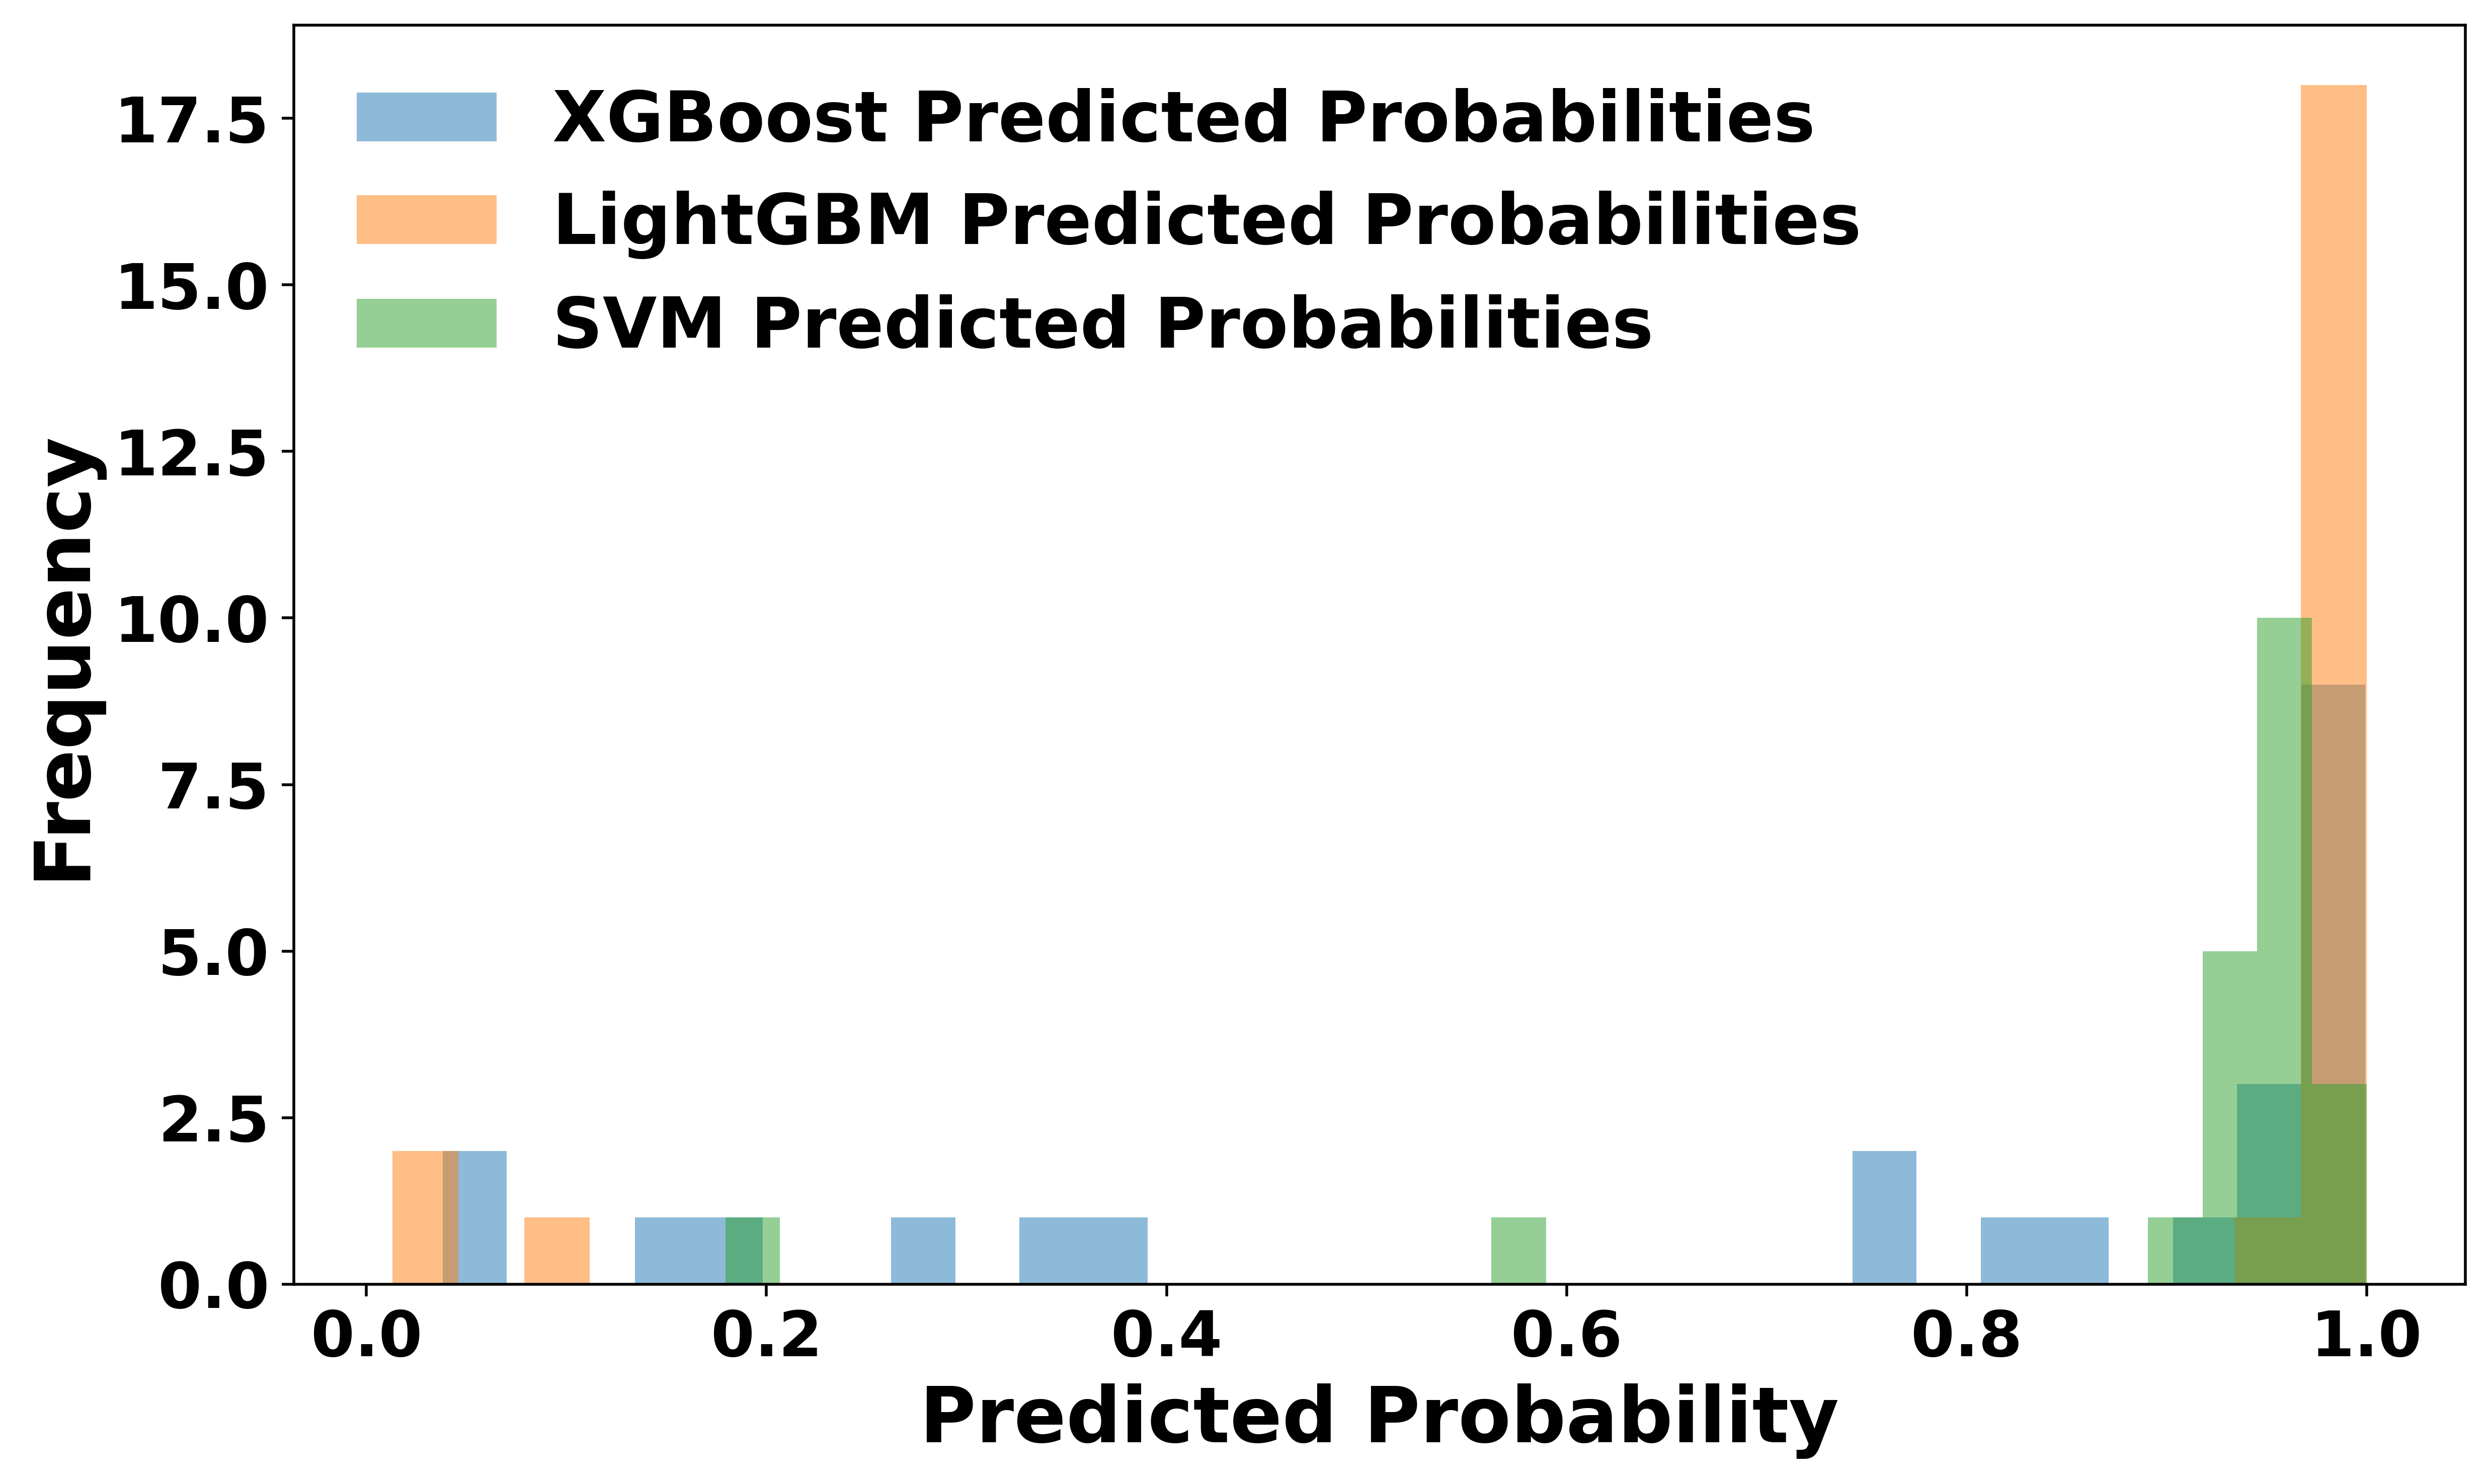

In [5]:
from matplotlib import font_manager
# 指定字体路径


# 可视化误分类的预测概率分布
plt.figure(figsize=(10, 6), dpi=500)

# 绘制每个模型的误分类样本的预测概率分布
for model in ['XGBoost', 'LightGBM', 'SVM']:
    model_data = all_misclassified[all_misclassified['Model'] == model]
    plt.hist(model_data['y_prob'], bins=30, alpha=0.5, label=f'{model} Predicted Probabilities')

# 设置 X 轴和 Y 轴标签，并加粗字体
plt.xlabel('Predicted Probability', fontsize=22, fontweight='bold')
plt.ylabel('Frequency', fontsize=22, fontweight='bold')

# 设置图例字体大小（去掉 fontweight，改用 fontproperties）
plt.legend(frameon=False, prop=bold_font)

# 调整刻度的字体大小和加粗
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# 显示图表
plt.tight_layout()
plt.show()

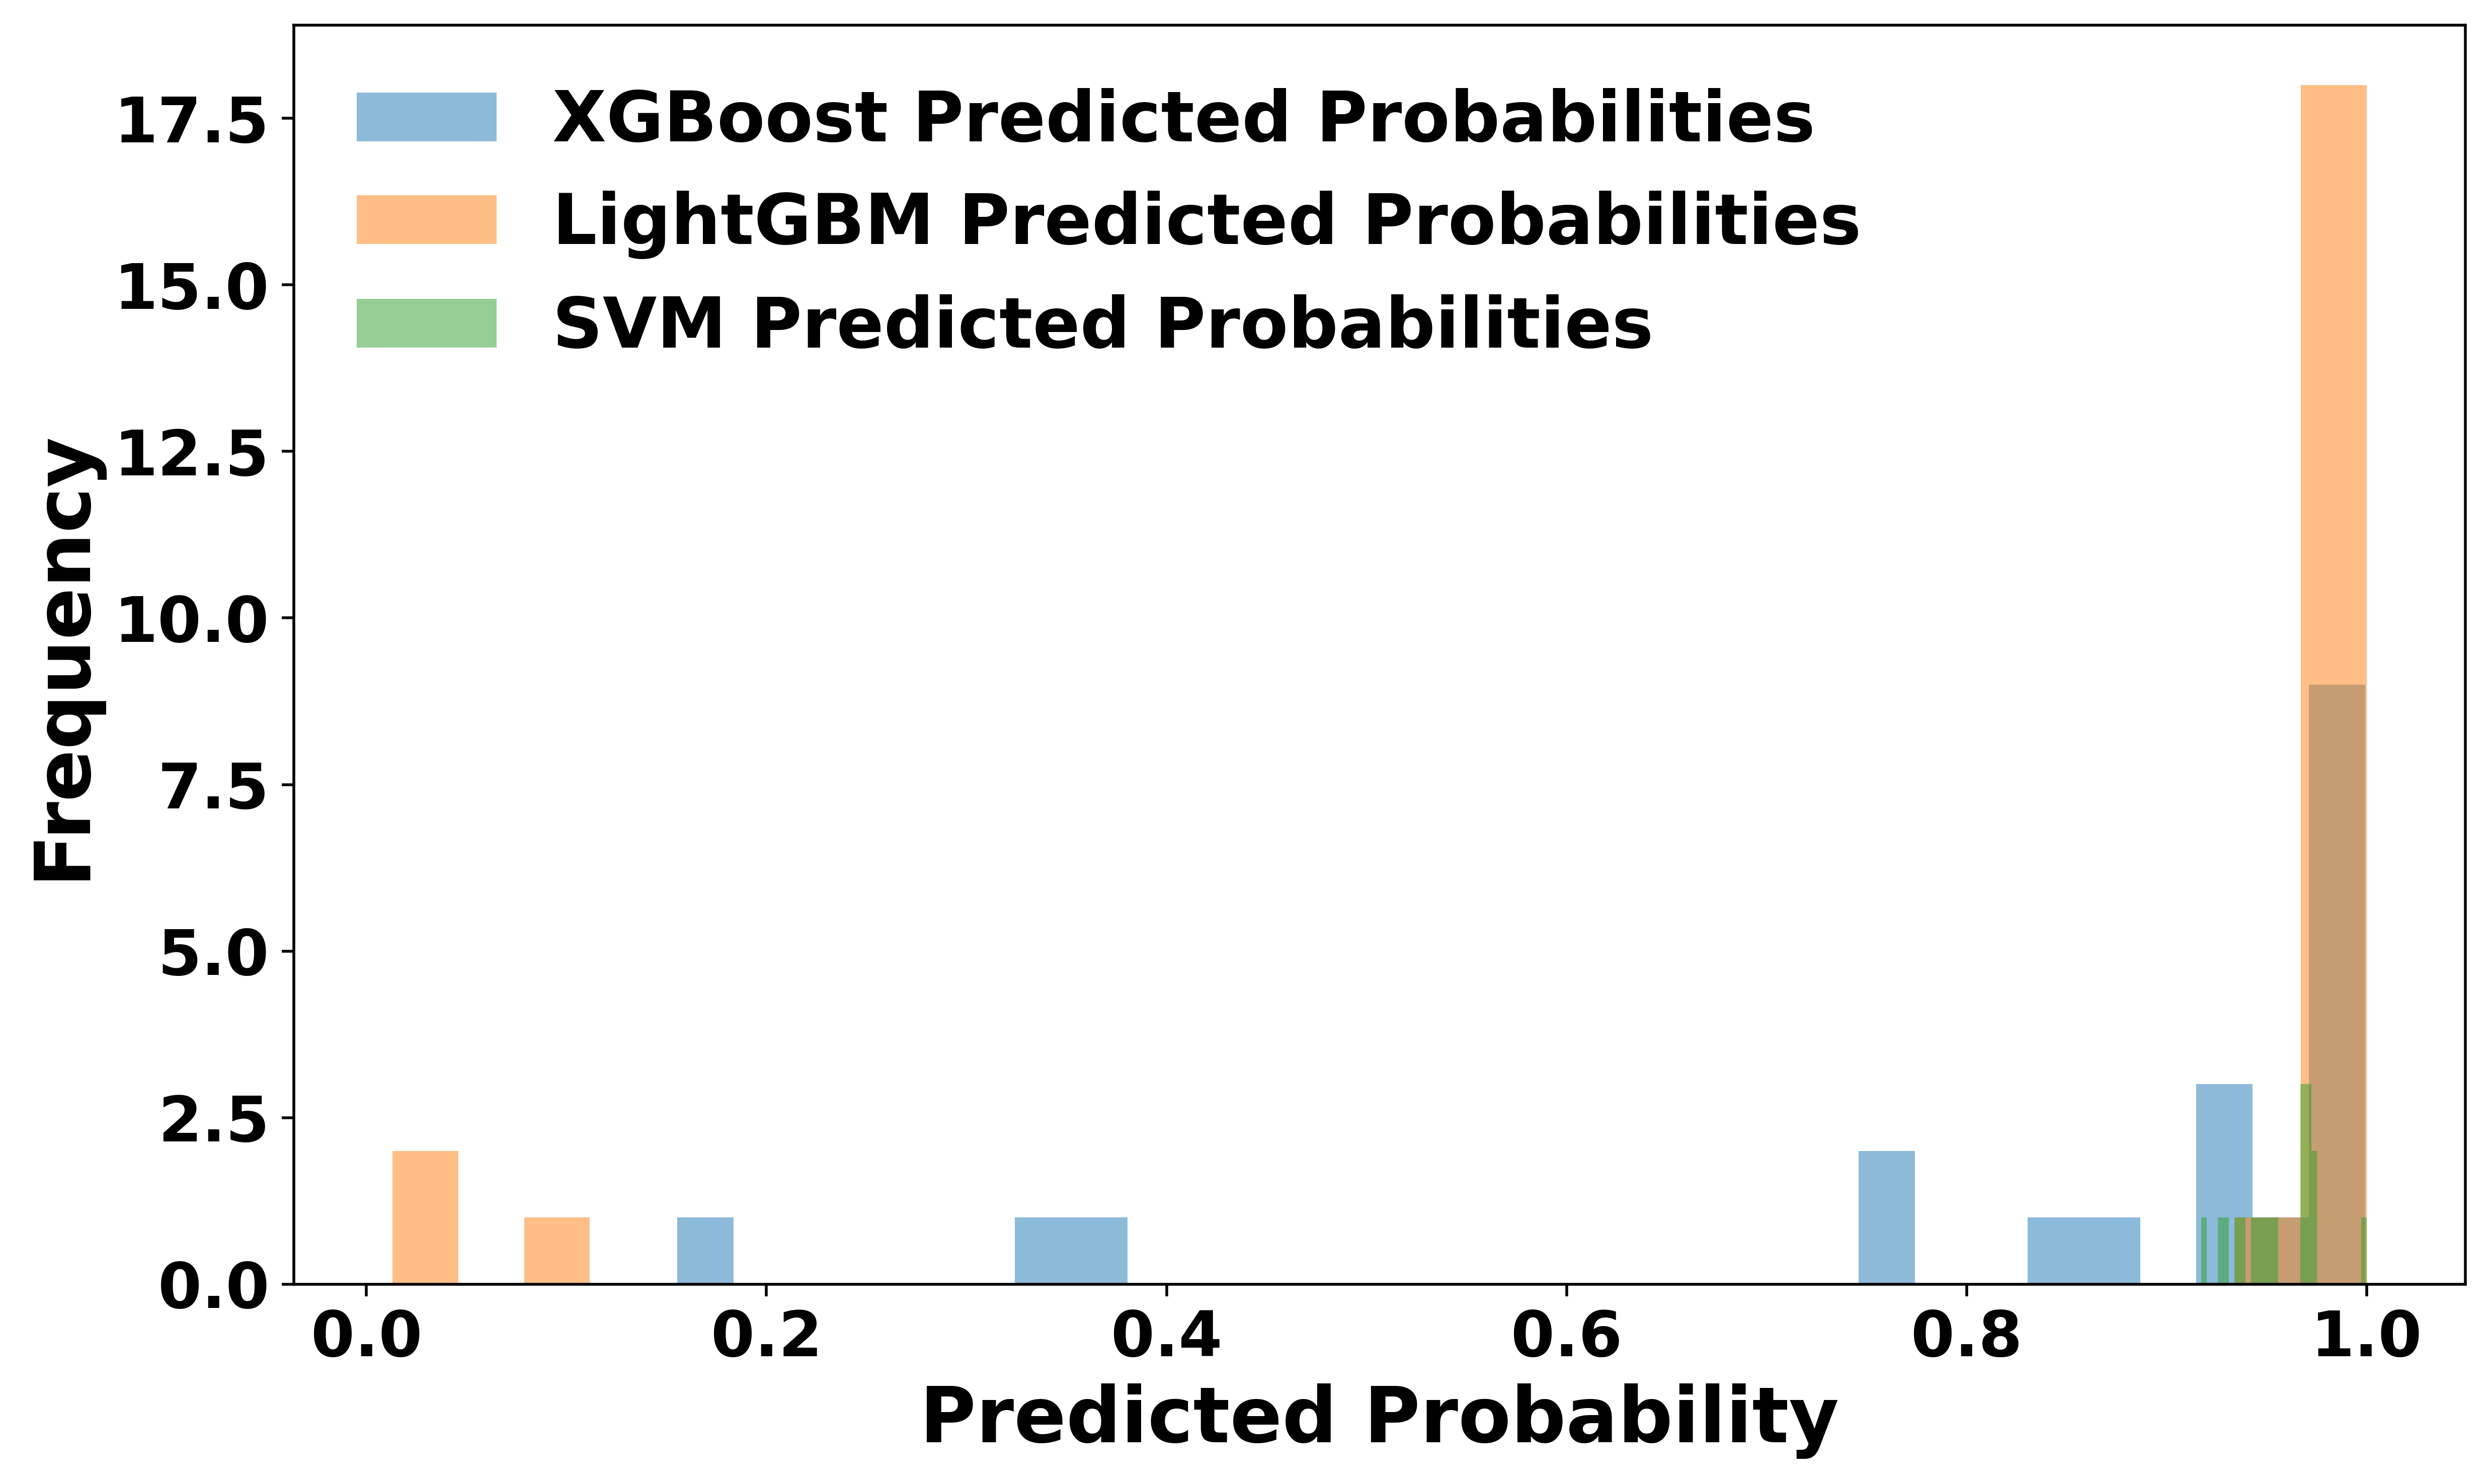

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 创建加粗字体对象
bold_font = font_manager.FontProperties(weight='bold', size=20)

# 可视化误分类的预测概率分布
plt.figure(figsize=(10, 6), dpi=500)

# 绘制每个模型的误分类样本的预测概率分布
for model in ['XGBoost', 'LightGBM', 'SVM']:
    model_data = high_freq_misclassified[high_freq_misclassified['Model'] == model]
    plt.hist(model_data['y_prob'], bins=30, alpha=0.5, label=f'{model} Predicted Probabilities')

# 设置 X 轴和 Y 轴标签，并加粗字体
plt.xlabel('Predicted Probability', fontsize=22, fontweight='bold')
plt.ylabel('Frequency', fontsize=22, fontweight='bold')

# 设置图例字体大小（去掉 fontweight，改用 fontproperties）
plt.legend(frameon=False, prop=bold_font)

# 调整刻度的字体大小和加粗
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# 显示图表
plt.tight_layout()
plt.show()
